# Konsep Entropi (Entropy)

Pada notebook ini, kita akan membahas konsep entropi yang merupakan konsep fundamental dalam teori informasi dan machine learning.

## Apa itu Entropi?

Entropi adalah ukuran ketidakpastian atau randomness dalam suatu sistem. Dalam konteks teori informasi dan machine learning, entropi mengukur jumlah informasi yang terkandung dalam suatu distribusi probabilitas.

## Rumus Dasar Entropi

Untuk variabel diskrit X dengan nilai-nilai yang mungkin x₁, x₂, ..., xₙ:

\[ H(X) = -\sum_{i=1}^{n} p(x_i) \log_2(p(x_i)) \]

di mana:
- H(X) adalah entropi dari variabel X
- p(x_i) adalah probabilitas nilai x_i
- log₂ digunakan untuk mengukur informasi dalam bits

## Sifat-sifat Entropi

1. Non-negatif: H(X) ≥ 0
2. Maksimum untuk distribusi uniform
3. Minimum (0) untuk distribusi deterministik
4. Aditif untuk variabel independen

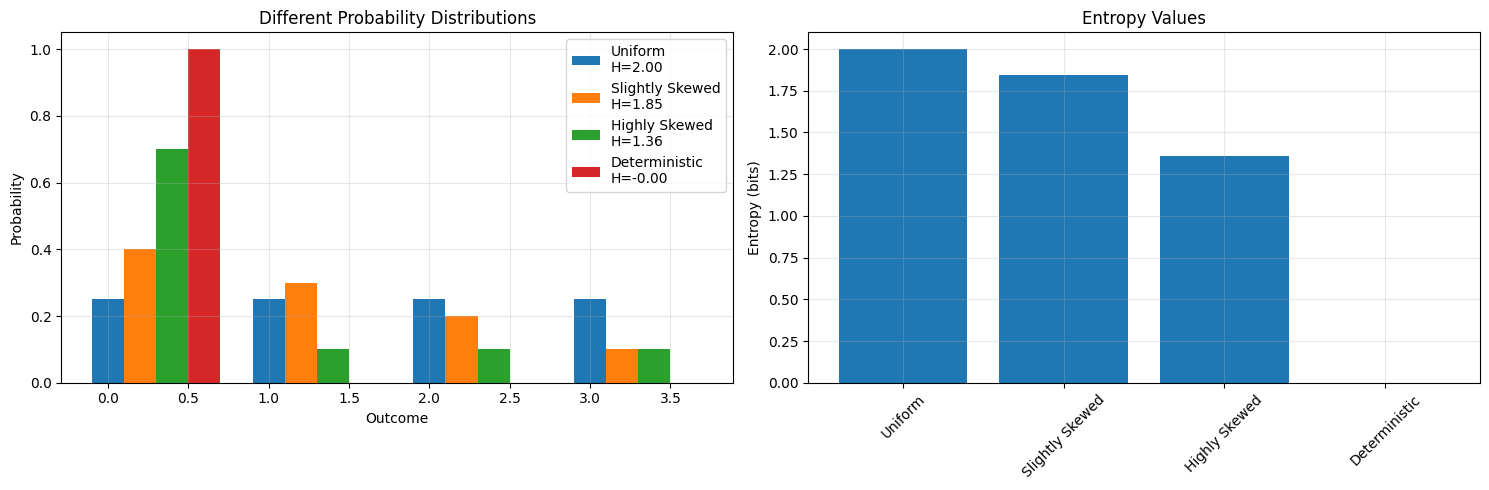

Entropy Values:
Uniform: 2.0000 bits
Slightly Skewed: 1.8464 bits
Highly Skewed: 1.3568 bits
Deterministic: -0.0000 bits


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def calculate_entropy(p):
    """
    Calculate entropy for probability distribution p
    """
    # Remove zero probabilities and avoid log(0)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

# Example 1: Compare different probability distributions
# Case 1: Uniform distribution (maximum entropy)
p1 = np.array([0.25, 0.25, 0.25, 0.25])

# Case 2: Slightly skewed distribution
p2 = np.array([0.4, 0.3, 0.2, 0.1])

# Case 3: Highly skewed distribution
p3 = np.array([0.7, 0.1, 0.1, 0.1])

# Case 4: Deterministic distribution (minimum entropy)
p4 = np.array([1.0, 0.0, 0.0, 0.0])

distributions = {
    'Uniform': p1,
    'Slightly Skewed': p2,
    'Highly Skewed': p3,
    'Deterministic': p4
}

# Calculate entropies
entropies = {name: calculate_entropy(p) for name, p in distributions.items()}

# Visualization
plt.figure(figsize=(15, 5))

# Plot probability distributions
plt.subplot(121)
x = np.arange(4)
width = 0.2
for i, (name, p) in enumerate(distributions.items()):
    plt.bar(x + i*width, p, width, label=f'{name}\nH={entropies[name]:.2f}')

plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Different Probability Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot entropies
plt.subplot(122)
plt.bar(distributions.keys(), entropies.values())
plt.ylabel('Entropy (bits)')
plt.title('Entropy Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("Entropy Values:")
for name, h in entropies.items():
    print(f"{name}: {h:.4f} bits")

## Entropi dalam Machine Learning

Entropi memiliki banyak aplikasi dalam machine learning, terutama dalam:

1. **Decision Trees**:
   - Information Gain = Entropi parent - Weighted sum of entropi children
   - Digunakan untuk memilih fitur terbaik untuk splitting

2. **Feature Selection**:
   - Mutual Information berdasarkan entropi
   - Mengukur dependensi antara fitur dan target

3. **Clustering**:
   - Mengukur homogenitas cluster
   - Evaluasi kualitas clustering

Mari kita lihat contoh penggunaan entropi dalam decision tree:

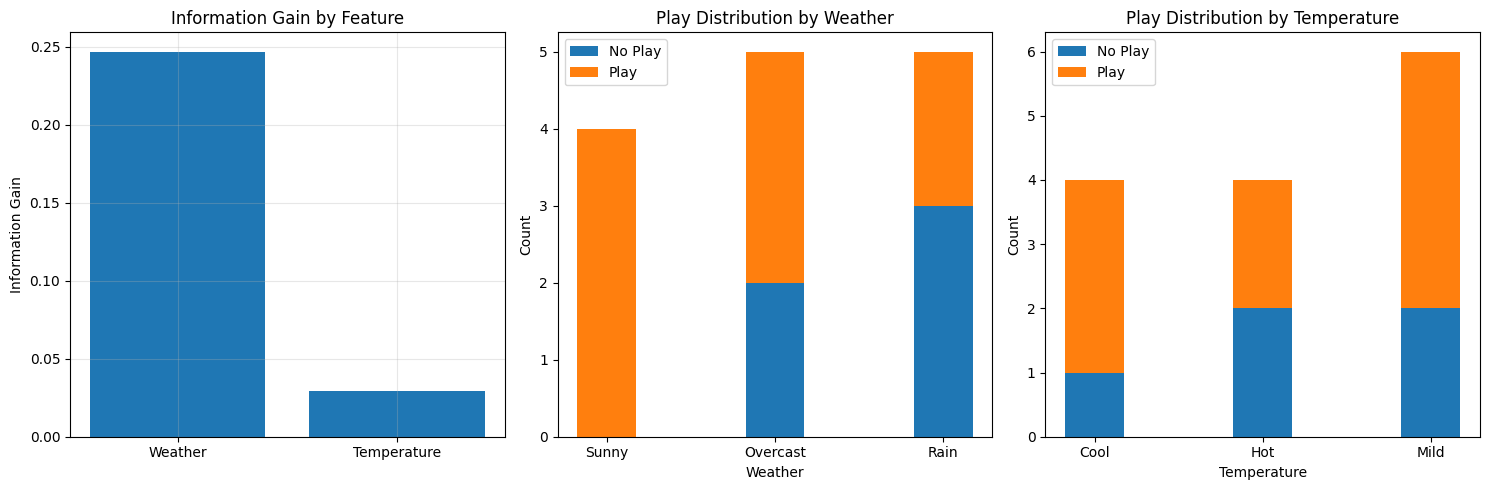

Information Gain Analysis:
Weather: 0.2467 bits
Temperature: 0.0292 bits

Entropy by Weather:
Sunny: -0.0000 bits
Overcast: 0.9710 bits
Rain: 0.9710 bits

Entropy by Temperature:
Cool: 0.8113 bits
Hot: 1.0000 bits
Mild: 0.9183 bits


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Create a simple dataset
weather = ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

# Convert categorical variables to numerical
le = LabelEncoder()
weather_encoded = le.fit_transform(weather)
temp_encoded = le.fit_transform(temp)
play_encoded = le.fit_transform(play)

# Combine features
X = np.column_stack([weather_encoded, temp_encoded])
y = play_encoded

def calculate_information_gain(feature, target):
    """
    Calculate information gain for a feature
    """
    # Calculate entropy of target
    target_entropy = calculate_entropy(np.bincount(target) / len(target))
    
    # Calculate weighted entropy of splits
    weighted_entropy = 0
    unique_values = np.unique(feature)
    
    for value in unique_values:
        mask = feature == value
        prop = np.sum(mask) / len(feature)
        split_entropy = calculate_entropy(np.bincount(target[mask]) / np.sum(mask))
        weighted_entropy += prop * split_entropy
    
    # Information gain is the difference
    return target_entropy - weighted_entropy

# Calculate information gain for each feature
info_gain_weather = calculate_information_gain(weather_encoded, play_encoded)
info_gain_temp = calculate_information_gain(temp_encoded, play_encoded)

# Visualize information gains
plt.figure(figsize=(15, 5))

# Plot 1: Information Gain
plt.subplot(131)
plt.bar(['Weather', 'Temperature'], [info_gain_weather, info_gain_temp])
plt.title('Information Gain by Feature')
plt.ylabel('Information Gain')
plt.grid(True, alpha=0.3)

# Plot 2: Class distribution by Weather
plt.subplot(132)
weather_counts = np.zeros((3, 2))  # 3 weather types, 2 play outcomes
for w in range(3):
    mask = weather_encoded == w
    counts = np.bincount(play_encoded[mask], minlength=2)
    weather_counts[w] = counts

weather_names = ['Sunny', 'Overcast', 'Rain']
x = np.arange(len(weather_names))
width = 0.35
plt.bar(x, weather_counts[:, 0], width, label='No Play')
plt.bar(x, weather_counts[:, 1], width, bottom=weather_counts[:, 0], label='Play')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Play Distribution by Weather')
plt.xticks(x, weather_names)
plt.legend()

# Plot 3: Class distribution by Temperature
plt.subplot(133)
temp_counts = np.zeros((3, 2))  # 3 temperature levels, 2 play outcomes
for t in range(3):
    mask = temp_encoded == t
    counts = np.bincount(play_encoded[mask], minlength=2)
    temp_counts[t] = counts

temp_names = ['Cool', 'Hot', 'Mild']
x = np.arange(len(temp_names))
plt.bar(x, temp_counts[:, 0], width, label='No Play')
plt.bar(x, temp_counts[:, 1], width, bottom=temp_counts[:, 0], label='Play')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Play Distribution by Temperature')
plt.xticks(x, temp_names)
plt.legend()

plt.tight_layout()
plt.show()

# Print numerical results
print("Information Gain Analysis:")
print(f"Weather: {info_gain_weather:.4f} bits")
print(f"Temperature: {info_gain_temp:.4f} bits")

# Calculate and print entropy for each split
print("\nEntropy by Weather:")
for w, name in enumerate(weather_names):
    mask = weather_encoded == w
    split_entropy = calculate_entropy(np.bincount(play_encoded[mask]) / np.sum(mask))
    print(f"{name}: {split_entropy:.4f} bits")

print("\nEntropy by Temperature:")
for t, name in enumerate(temp_names):
    mask = temp_encoded == t
    split_entropy = calculate_entropy(np.bincount(play_encoded[mask]) / np.sum(mask))
    print(f"{name}: {split_entropy:.4f} bits")

## Cross-Entropy dan KL Divergence

Cross-entropy dan KL Divergence adalah konsep terkait entropi yang sangat penting dalam machine learning:

1. **Cross-Entropy**:
   \[ H(p,q) = -\sum_{i} p(x_i) \log_2(q(x_i)) \]
   - Mengukur perbedaan antara distribusi sebenarnya (p) dan prediksi (q)
   - Digunakan sebagai loss function dalam klasifikasi

2. **KL Divergence**:
   \[ D_{KL}(p||q) = \sum_{i} p(x_i) \log_2(\frac{p(x_i)}{q(x_i)}) \]
   - Mengukur seberapa berbeda dua distribusi probabilitas
   - KL(p||q) = H(p,q) - H(p)

Mari kita visualisasikan konsep ini:

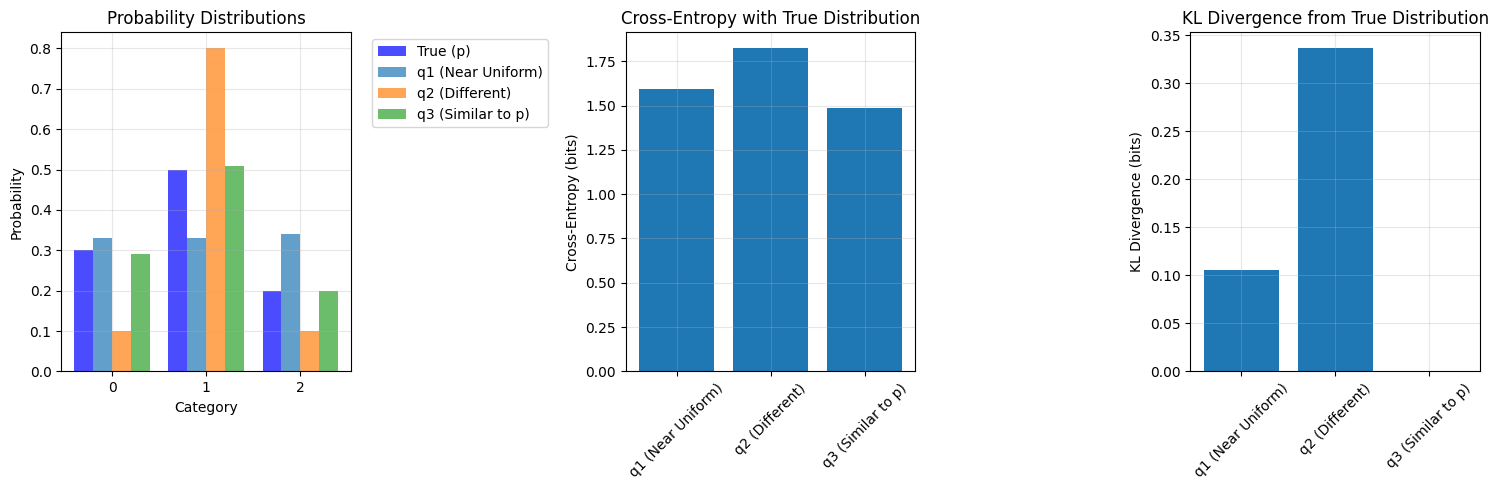

Metrics for Different Distributions:

True distribution p: [0.3 0.5 0.2]

q1 (Near Uniform):
Distribution: [0.33 0.33 0.34]
Cross-Entropy: 1.5908 bits
KL Divergence: 0.1054 bits

q2 (Different):
Distribution: [0.1 0.8 0.1]
Cross-Entropy: 1.8219 bits
KL Divergence: 0.3365 bits

q3 (Similar to p):
Distribution: [0.29 0.51 0.2 ]
Cross-Entropy: 1.4859 bits
KL Divergence: 0.0004 bits


In [85]:
from scipy.special import rel_entr

def cross_entropy(p, q):
    """Calculate cross-entropy between distributions p and q"""
    return -np.sum(p * np.log2(q))

def kl_divergence(p, q):
    """Calculate KL divergence between distributions p and q"""
    return np.sum(rel_entr(p, q)) / np.log(2)  # Convert to bits

# Create example distributions
# True distribution (p)
p = np.array([0.3, 0.5, 0.2])

# Different predicted distributions (q)
q1 = np.array([0.33, 0.33, 0.34])  # Close to uniform
q2 = np.array([0.1, 0.8, 0.1])     # Different from p
q3 = np.array([0.29, 0.51, 0.2])   # Close to p

distributions = {
    'q1 (Near Uniform)': q1,
    'q2 (Different)': q2,
    'q3 (Similar to p)': q3
}

# Calculate metrics
results = {}
for name, q in distributions.items():
    results[name] = {
        'Cross-Entropy': cross_entropy(p, q),
        'KL Divergence': kl_divergence(p, q)
    }

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Compare distributions
plt.subplot(131)
x = np.arange(3)
width = 0.2

plt.bar(x - 1.5*width, p, width, label='True (p)', color='blue', alpha=0.7)
for i, (name, q) in enumerate(distributions.items()):
    plt.bar(x + (i-0.5)*width, q, width, label=name, alpha=0.7)

plt.xlabel('Category')
plt.ylabel('Probability')
plt.title('Probability Distributions')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)

# Plot 2: Cross-entropy
plt.subplot(132)
cross_entropies = [results[name]['Cross-Entropy'] for name in distributions]
plt.bar(distributions.keys(), cross_entropies)
plt.ylabel('Cross-Entropy (bits)')
plt.title('Cross-Entropy with True Distribution')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 3: KL divergence
plt.subplot(133)
kl_divergences = [results[name]['KL Divergence'] for name in distributions]
plt.bar(distributions.keys(), kl_divergences)
plt.ylabel('KL Divergence (bits)')
plt.title('KL Divergence from True Distribution')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("Metrics for Different Distributions:")
print("\nTrue distribution p:", p)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Distribution: {distributions[name]}")
    print(f"Cross-Entropy: {metrics['Cross-Entropy']:.4f} bits")
    print(f"KL Divergence: {metrics['KL Divergence']:.4f} bits")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar entropi dalam teori informasi
2. Aplikasi entropi dalam machine learning:
   - Information gain dalam decision trees
   - Feature selection
   - Evaluasi model
3. Cross-entropy dan KL divergence:
   - Pengukuran perbedaan distribusi
   - Loss functions dalam deep learning
   - Model evaluation

Poin-poin penting:
- Entropi mengukur ketidakpastian dalam distribusi probabilitas
- Information gain membantu dalam pemilihan fitur
- Cross-entropy dan KL divergence penting dalam evaluasi model

## Latihan

1. Implementasikan perhitungan entropi untuk dataset klasifikasi multi-kelas
2. Bandingkan information gain berbagai fitur dalam dataset real
3. Visualisasikan perubahan entropi dalam proses training model
4. Implementasikan decision tree sederhana menggunakan information gain
5. Analisis pengaruh noise terhadap entropi data

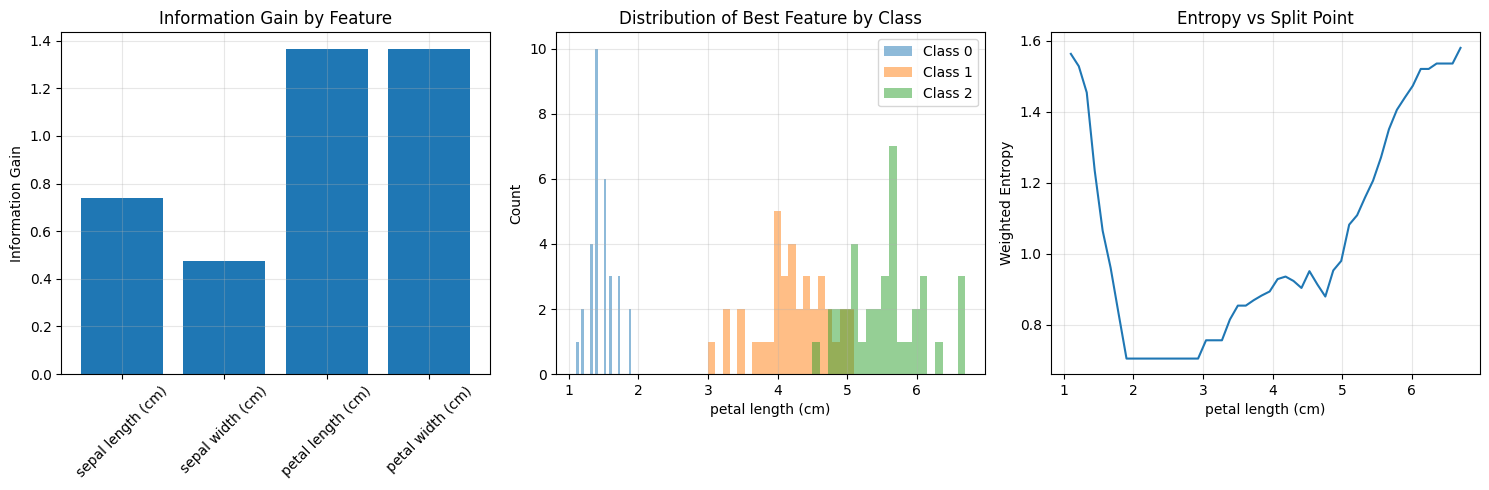

Dataset Entropy Analysis:
Total Entropy: 1.5802 bits

Information Gain by Feature:
sepal length (cm): 0.7411 bits
sepal width (cm): 0.4739 bits
petal length (cm): 1.3664 bits
petal width (cm): 1.3638 bits


In [87]:
# Latihan 1: Entropi untuk klasifikasi multi-kelas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Calculate entropy for different subsets
def calculate_class_entropy(y):
    """Calculate entropy for class distribution"""
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return calculate_entropy(probabilities)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate entropy for different features
def feature_entropy(X, y, feature_idx, n_bins=10):
    """Calculate weighted entropy after splitting on a feature"""
    # Discretize feature
    bins = np.linspace(X[:, feature_idx].min(), X[:, feature_idx].max(), n_bins+1)
    digitized = np.digitize(X[:, feature_idx], bins)
    
    # Calculate weighted entropy
    weighted_entropy = 0
    total_samples = len(y)
    
    for bin_idx in range(1, n_bins+1):
        mask = digitized == bin_idx
        if np.sum(mask) > 0:
            prop = np.sum(mask) / total_samples
            bin_entropy = calculate_class_entropy(y[mask])
            weighted_entropy += prop * bin_entropy
            
    return weighted_entropy

# Calculate information gain for each feature
total_entropy = calculate_class_entropy(y_train)
information_gains = []
feature_names = iris.feature_names

for i in range(X_train.shape[1]):
    weighted_entropy = feature_entropy(X_train, y_train, i)
    info_gain = total_entropy - weighted_entropy
    information_gains.append(info_gain)

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Information Gain by Feature
plt.subplot(131)
plt.bar(feature_names, information_gains)
plt.xticks(rotation=45)
plt.ylabel('Information Gain')
plt.title('Information Gain by Feature')
plt.grid(True, alpha=0.3)

# Plot 2: Feature Distributions by Class
plt.subplot(132)
best_feature = np.argmax(information_gains)
for class_idx in range(3):
    mask = y_train == class_idx
    plt.hist(X_train[mask, best_feature], bins=20, alpha=0.5, 
            label=f'Class {class_idx}')
plt.xlabel(feature_names[best_feature])
plt.ylabel('Count')
plt.title('Distribution of Best Feature by Class')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Entropy vs Split Point
plt.subplot(133)
split_points = np.linspace(X_train[:, best_feature].min(),
                          X_train[:, best_feature].max(), 50)
entropies = []

for split in split_points:
    left_mask = X_train[:, best_feature] <= split
    right_mask = ~left_mask
    
    left_entropy = calculate_class_entropy(y_train[left_mask])
    right_entropy = calculate_class_entropy(y_train[right_mask])
    
    weighted_entropy = (np.sum(left_mask) * left_entropy + 
                       np.sum(right_mask) * right_entropy) / len(y_train)
    entropies.append(weighted_entropy)

plt.plot(split_points, entropies)
plt.xlabel(feature_names[best_feature])
plt.ylabel('Weighted Entropy')
plt.title('Entropy vs Split Point')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
print("Dataset Entropy Analysis:")
print(f"Total Entropy: {total_entropy:.4f} bits\n")
print("Information Gain by Feature:")
for name, gain in zip(feature_names, information_gains):
    print(f"{name}: {gain:.4f} bits")